<a href="https://colab.research.google.com/github/Haeune-Jeon/CV/blob/main/1_%EB%B2%A0%EC%8A%A4%ED%8A%B8_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# *** 데이터 불러오기 ***
from google.colab import drive
drive.mount('/content/gdrive')  #gdrive 말고 drive나 다른 drive를 써도 됨.

Mounted at /content/gdrive


In [ ]:
# 경로 변경 - 내 기본 작업경로가 pytest_img가 되도록 설정함
%cd /content/gdrive/MyDrive/pytest_img/

/content/gdrive/MyDrive/pytest_img


In [ ]:
import pandas as pd

# 첫 줄이 제목이 아님을 밝힌다
df = pd.read_csv("wine.csv", header=None)  # header : 칼럼명 -> None으로 설정해줌으로써, 칼럼명이 없음을 밝힘
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
# ** 데이터 뒤섞기 : DataFrame의 frac 인자를 이용하여 데이터를 뒤섞는다 ***

# 원본 데이터의 100%를 랜덤하게 불러온다
df = df.sample(frac=1)  #'1'이라고 했으니까 100% 갖고오는 것
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
4316,6.8,0.16,0.29,10.4,0.046,59.0,143.0,0.99518,3.20,0.40,10.8,6,0
5354,7.8,0.19,0.32,7.4,0.015,47.0,124.0,0.99278,2.99,0.39,11.0,6,0
5414,6.3,0.43,0.32,8.8,0.042,18.0,106.0,0.99172,3.28,0.33,12.9,7,0
3749,7.0,0.24,0.34,3.0,0.035,36.0,102.0,0.99050,3.18,0.43,12.2,6,0
1323,9.1,0.36,0.39,1.8,0.060,21.0,55.0,0.99495,3.18,0.82,11.0,7,1


In [ ]:
# *** 데이터 정보 ***
df.info()

# 0: 주석산 농도, 1: 아세트산 농도, 2: 구연산 농도
# 3: 잔류 당분 농도, 4: 염화나트륨 농도, 5: 유리 아황산 농도
# 6: 총 아황산 농도, 7: 밀도, 8: pH, 9: 황산칼륨 농도, 10: 알코올 돋수
# 11: 와인의 맛 (1~10등급), 12: class(1: 레드와인, 0: 화이트와인)

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 4316 to 5908
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [ ]:
# *** 데이터 분리 ***

# 독립변수와 종속변수 분리
X = df.iloc[:, :12]  # [행, 열] ->12번째 인덱스인 13번째 컬럼은 포함되지 않음 ([include : exclude]) //// 독립변수  //// 대문자인 이유 : 2차원 이상의 data
y = df.iloc[:, 12]  # 종속변수  //// 소문자인 이유 : 1차원의 data

In [ ]:
# 훈련 데이터와 테스트 데이터를 8:2로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)  # test_size = 0.2 --> train_size는 자동으로 0.8이 됨 (X,y 모두 8:2로 나눠짐)

print(X_train.head())
print("*************")
print(X_test.head())

        0     1     2    3      4     5      6        7     8     9     10  11
5485   6.8  0.33  0.31  7.4  0.045  34.0  143.0  0.99226  3.06  0.55  12.2   6
183    6.8  0.61  0.20  1.8  0.077  11.0   65.0  0.99710  3.54  0.58   9.3   5
775    7.2  1.00  0.00  3.0  0.102   7.0   16.0  0.99586  3.43  0.46  10.0   5
812   10.8  0.45  0.33  2.5  0.099  20.0   38.0  0.99818  3.24  0.71  10.8   5
4454   6.9  0.33  0.26  5.0  0.027  46.0  143.0  0.99240  3.25  0.43  11.2   7
*************
       0     1     2     3      4     5      6        7     8     9     10  11
5901  7.1  0.39  0.39  11.1  0.034  25.0  204.0  0.99616  3.05  0.52  10.0   6
6376  5.9  0.27  0.32   2.0  0.034  31.0  102.0  0.98952  3.16  0.56  12.3   6
4652  7.6  0.17  0.36   4.5  0.042  26.0  102.0  0.99427  3.09  0.47   9.5   5
684   9.8  0.98  0.32   2.3  0.078  35.0  152.0  0.99800  3.25  0.48   9.4   5
2542  6.9  0.48  0.36   3.5  0.030  31.0  135.0  0.99040  3.14  0.38  12.2   7


In [ ]:
# *** 모델 설정 ***

# 해당 클래스를 직접 사용할 수 있도록 import 한다
from keras.models import Sequential
from keras.layers import Dense, Input

# 모델 설정 - 기준 없고, 알아서... (활성화 함수만 제대로 쓰면 OK) -> 단, 최종분류층은 앞의 분류층보다 작아야 함!!!
model = Sequential()
model.add(Input((12,)))  # 총 12개의 독립변수가 있으니까, Input layer의 크기는 12  //// 12, 라고 comma를 쓰는 이유: input layer이 튜플 형태로 들어가야 해서...!!
model.add(Dense(32, activation='relu'))  # 은닉층 (32 uint)
model.add(Dense(16, activation='relu'))  # 은닉층 (16 uint)
model.add(Dense(8, activation='relu'))  # 은닉층 (8 uint)
model.add(Dense(1, activation='sigmoid'))  # 출력층 (1 uint) - 이진분류니까 sigmoid  (cf. 다중분류 - softmax)

In [ ]:
# *** 모델 확인 ***
model.summary()
# 결과 중, param이 너무 크면, 모델이 너무 복잡하기 때문에, 과적합 상태가 발생할 수 있

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# *** 모델 훈련 ***

# 검증 데이터를 만든다
# 검증 데이터의 성능을 보기 위해 훈련 과정을 history 변수에 담는다
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)  # validation_split : 20%만 평가 <- epoch이 끝날때마다 평가

Epoch 1/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.7939 - loss: 0.5114 - val_acc: 0.9317 - val_loss: 0.2357
Epoch 2/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9290 - loss: 0.2250 - val_acc: 0.9337 - val_loss: 0.1920
Epoch 3/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9393 - loss: 0.1813 - val_acc: 0.9356 - val_loss: 0.1790
Epoch 4/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9381 - loss: 0.1741 - val_acc: 0.9346 - val_loss: 0.1651
Epoch 5/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9397 - loss: 0.1677 - val_acc: 0.9413 - val_loss: 0.1513
Epoch 6/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9415 - loss: 0.1662 - val_acc: 0.9413 - val_loss: 0.1471
Epoch 7/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9514 - loss: 0.1388 - val_acc: 0.9442 - val_loss: 0.1396
Epoch 8/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9520 - loss: 0.1298 - val_acc: 0.9471 - val_loss: 0.1308
Epoch 9/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [ ]:
# *** Acc & Loss 확인 ***

acc = history.history['acc']  # 훈련 data의 정확도
val_acc = history.history['val_acc']  # 검증 data의 정확도
loss = history.history['loss']  #훈련 data 손실값
val_loss = history.history['val_loss'] # 검증 data 손실값

print('Validation accuracy of each epoch:', val_acc)

Validation accuracy of each epoch: [0.9317307472229004, 0.9336538314819336, 0.9355769157409668, 0.9346153736114502, 0.9413461685180664, 0.9413461685180664, 0.9442307949066162, 0.9471153616905212, 0.949999988079071, 0.9442307949066162, 0.9509615302085876, 0.9576923251152039, 0.9567307829856873, 0.9653846025466919, 0.9692307710647583, 0.9605769515037537, 0.9663461446762085, 0.9711538553237915, 0.9673076868057251, 0.9740384817123413, 0.9740384817123413, 0.9711538553237915, 0.9730769395828247, 0.9730769395828247, 0.9682692289352417, 0.9798076748847961, 0.9711538553237915, 0.9769230484962463, 0.9778845906257629, 0.9778845906257629, 0.9769230484962463, 0.9778845906257629, 0.9788461327552795, 0.9769230484962463, 0.9798076748847961, 0.9759615659713745, 0.9769230484962463, 0.9798076748847961, 0.9740384817123413, 0.9798076748847961, 0.9769230484962463, 0.9769230484962463, 0.9807692170143127, 0.9807692170143127, 0.9759615659713745, 0.9798076748847961, 0.9798076748847961, 0.9769230484962463, 0.978

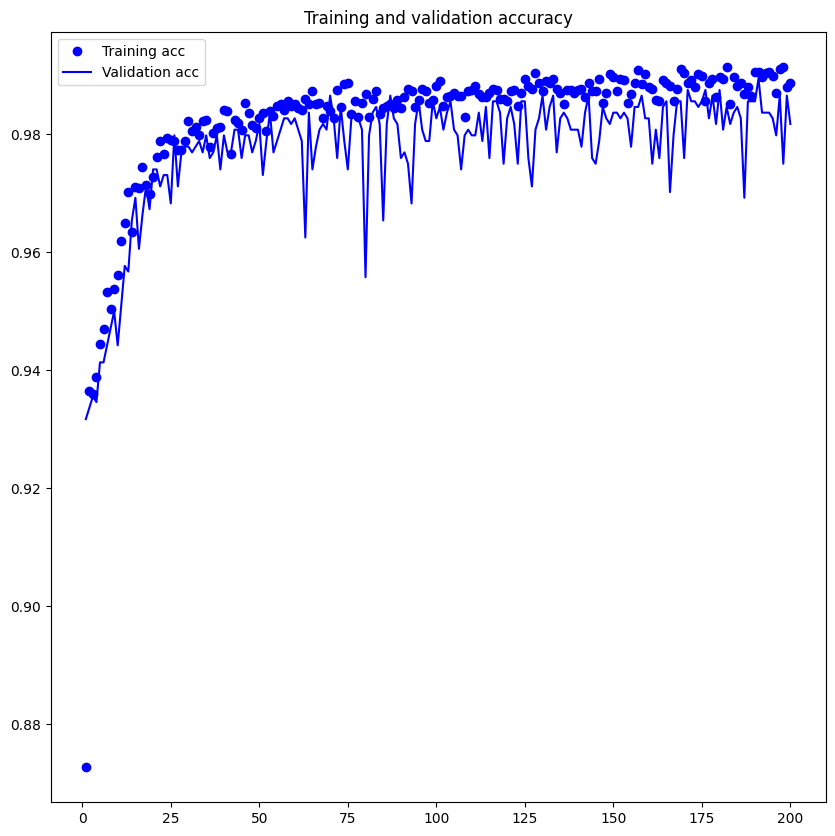

In [ ]:
from ast import increment_lineno
# *** 정확도 그래프 확인 ***
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(acc)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, acc, 'bo', label='Training acc')  # bo: 파란 점
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # b : 파란 선
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

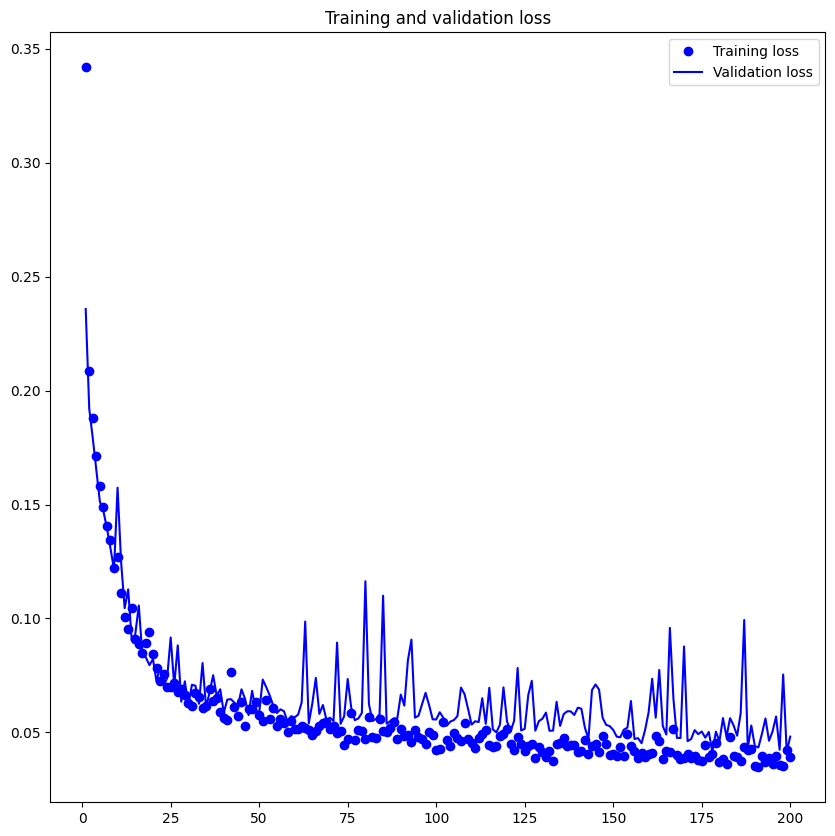

In [ ]:
# *** 손실값 그래프 확인 ***
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'bo', label='Training loss')  # bo: 파란 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# *** 최종 모델로 테스트 데이터를 확인한다 ***
# 최종 모델은 과적합 상태임
evaluation = model.evaluate(X_test, y_test)
print('loss : ', evaluation[0])
print('accuracy : ', evaluation[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9762 - loss: 0.0901
loss :  0.08026492595672607
accuracy :  0.9800000190734863


In [ ]:
# *** Best 모델 저장 1 ***
# 마지막 모델을 Best 모델로 간주하고 저장
# 또는 Best 모델이 생성되는 특정 epochs까지 다시 훈련 뒤 저장

# 저장경로 확보
import os
model_dir = '/content/gdrive/MyDrive/pytest_img/models/'

if not os.path.exists(model_dir):
  os.mkdir(model_dir)

# 현재 epochs (최종 epoch)의 모델 저장
model.save('/content/gdrive/MyDrive/pytest_img/models/wine.keras')

# 모델 불러오기 및 컴파일
from tensorflow.keras.models import load_model
loded_model = load_model('/content/gdrive/MyDrive/pytest_img/models/wine.keras')
loded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])  # 꼭 앞에서 사용한 loss function, optimizer, metrics 모두 동일하게 작성!!

In [ ]:
# *** Best 모델 저장 2 ***
# ModelCheckpoint이용
# 매 epochs마다 모델을 저장하되, 앞서 저장한 모델보다 나아졌을 때만 저장하게 함

# 현재 epochs까지에서 베스트 모델을 저장
# 발전과정을 보려면 다음과 같이 한다 modelpath = model_dir+"{epoch:d}-{val_loss:4f.kreas}"  <- 근데 굳이 봐야함...??
modelpath = model_dir+"wine.keras"

from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)  # model은 정확성이 아니라 loss를 기준으로 가중치 정함

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1, callbacks=[checkpointer])  # verbose = 0 은 silent /// verbose = 1은 상태 출력
# callbaks의 전달인자에 checkpointer를 넣어주면, 이전보다 좋은 것만 저장하고, 이전보다 좋지 않은 것은 저장하지 않음 -> 최선의 model만 남게 됨

Epoch 1/200
110/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9889 - loss: 0.0453
Epoch 1: val_loss improved from inf to 0.04504, saving model to /content/gdrive/MyDrive/pytest_img/models/wine.keras
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9890 - loss: 0.0445 - val_acc: 0.9846 - val_loss: 0.0450
Epoch 2/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9882 - loss: 0.0372
Epoch 2: val_loss did not improve from 0.04504
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9882 - loss: 0.0372 - val_acc: 0.9827 - val_loss: 0.0526
Epoch 3/200
128/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9886 - loss: 0.0385
Epoch 3: val_loss did not improve from 0.04504
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9886 - loss: 0.0385 - val_acc: 0.9808 - val_loss: 0.0512
Epoch 4/200
125/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9916 - loss: 0.0300
Epoch 4: val_loss did not improve from 0.04504
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9915 - loss: 0.0303 - val_acc: 0.9837 - val

In [ ]:
# *** Best 모델 저장2 - Best 모델 불러온 뒤 예측하기 ***
# 모델 불러오기
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/gdrive/MyDrive/pytest_img/models/wine.keras')
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# 불러온 모델로 전체 테스트 데이터 예측
loaded_model.predict(X_test)

# Best 모델로 테스트 데이터 정확도 확인
loaded_model.evaluate(X_test, y_test)[1]

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9833 - loss: 0.0841   


0.9861538410186768